In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from plotly.offline import iplot
import plotly.graph_objects as go

# Data processing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

# Hyperparameter tuning with grid search with cross validation
from sklearn.model_selection import GridSearchCV

# Algorithm libraries
# 1. Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression
# 3. K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
# 4. CatBoost
from catboost import CatBoostClassifier
# 5. Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 6. Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 7. Naive Bayes
from sklearn.naive_bayes import GaussianNB
# 8. XGBoost
from xgboost import XGBClassifier
# 9. LightGBM
from lightgbm import LGBMClassifier
# 10. AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Evaluating libralies
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree

# Warning library
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the dataset from 'Travel_Insurance.csv' file

data = pd.read_csv('.../Travel_Insurance.csv')
data.head()

Id  Age               Employment_Type Graduate  Annual_Income  \
0   1   31             Government Sector      Yes         400000   
1   2   31  Private Sector/Self Employed      Yes        1250000   
2   3   34  Private Sector/Self Employed      Yes         500000   
3   4   28  Private Sector/Self Employed      Yes         700000   
4   5   28  Private Sector/Self Employed      Yes         700000   

   Family_Members  Chronic_Diseases Frequent_Flyer Ever_Travelled_Abroad  \
0               6                 1             No                    No   
1               7                 0             No                    No   
2               4                 1             No                    No   
3               3                 1             No                    No   
4               8                 1            Yes                    No   

   Response  
0         0  
1         0  
2         1  
3         0  
4         0

In [3]:
# Check missing value in the dataset

data.isnull().sum()

Id                       0
Age                      0
Employment_Type          0
Graduate                 0
Annual_Income            0
Family_Members           0
Chronic_Diseases         0
Frequent_Flyer           0
Ever_Travelled_Abroad    0
Response                 0
dtype: int64

In [4]:
# There are no missing values in this dataset

# Observe the dataset
data.describe()

Id          Age  Annual_Income  Family_Members  \
count  1987.000000  1987.000000   1.987000e+03     1987.000000   
mean    994.000000    29.650226   9.327630e+05        4.752894   
std     573.741812     2.913308   3.768557e+05        1.609650   
min       1.000000    25.000000   3.000000e+05        2.000000   
25%     497.500000    28.000000   6.000000e+05        4.000000   
50%     994.000000    29.000000   9.000000e+05        5.000000   
75%    1490.500000    32.000000   1.250000e+06        6.000000   
max    1987.000000    35.000000   1.800000e+06        9.000000   

       Chronic_Diseases     Response  
count       1987.000000  1987.000000  
mean           0.277806     0.357323  
std            0.448030     0.479332  
min            0.000000     0.000000  
25%            0.000000     0.000000  
50%            0.000000     0.000000  
75%            1.000000     1.000000  
max            1.000000     1.000000

In [5]:
##### Exploratory Data Analysis (EDA) #####

0    1277
1     710
Name: Response, dtype: int64


[]

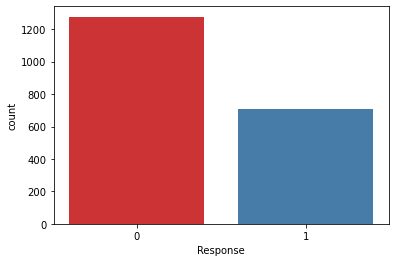

In [6]:
# Target Variable (Response) plot, where: 0 is not buy, 1 is buy

# Display total number
print(data.Response.value_counts())
sns.countplot(data.Response, palette = 'Set1')

#visualise the result
plt.plot()

[]

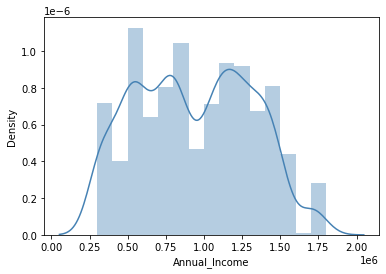

In [7]:
# The distribution plot of the Annual Income column
sns.distplot(data.Annual_Income, color = 'steelblue')

# visualise the result
plt.plot()

[]

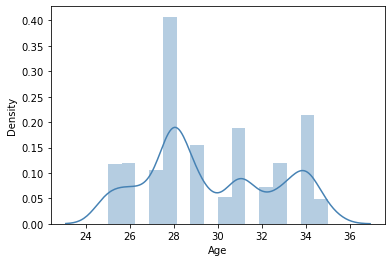

In [8]:
# The distribution plot of the Age column
sns.distplot(data.Age, color = 'steelblue')

# visualise the result
plt.plot()

[]

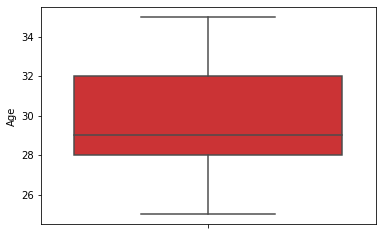

In [9]:
# The boxplot of the Age column

sns.boxplot(y = 'Age', data = data, palette = 'Set1')

# visualise the result
plt.plot()

[]

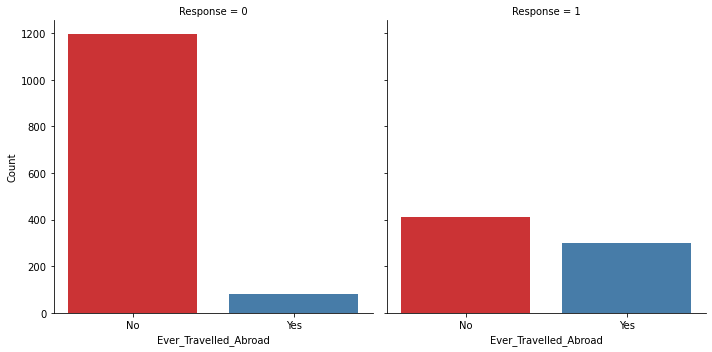

In [10]:
# Plot the relationship between Ever Travel Abroad and Response
df1 = data.groupby(['Ever_Travelled_Abroad', 'Response'])['Id'].count().to_frame().rename(columns = {'Id':'Count'}).reset_index()
graph1 = sns.catplot(x = 'Ever_Travelled_Abroad', y = 'Count', col = 'Response',
                data = df1, kind = 'bar',
                height = 5, aspect = 1, palette = 'Set1')

# visualise the result
plt.plot()

[]

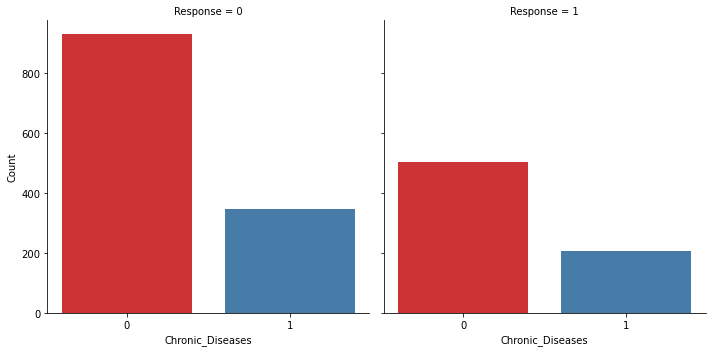

In [11]:
# Plot the relationship between Chronic Diseases and Response
df2 = data.groupby(['Chronic_Diseases', 'Response'])['Id'].count().to_frame().rename(columns = {'Id':'Count'}).reset_index()
graph2 = sns.catplot(x = 'Chronic_Diseases', y = 'Count', col = 'Response',
                data = df2, kind = 'bar',
                height = 5, aspect = 1, palette = 'Set1')

# visualise the result
plt.plot()

[]

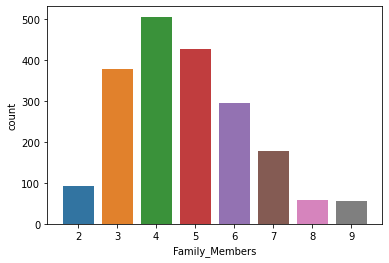

In [12]:
# The histogram plot of the Family members column
sns.countplot(data.Family_Members)

# visualise the result
plt.plot()

[]

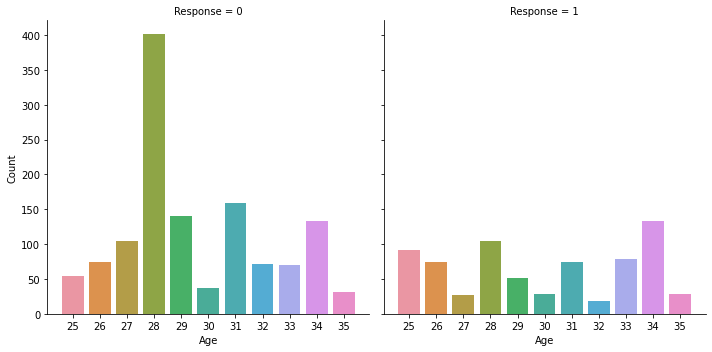

In [13]:
# Plot the relationship between Family Members and Response
df3 = data.groupby(['Age','Response'])['Id'].count().to_frame().rename(columns = {'Id':'Count'}).reset_index()
graph3 = sns.catplot(x = 'Age', y = 'Count', col = 'Response',
                data = df3, kind = 'bar',
                height = 5, aspect = 1)

# visualise the result
plt.plot()

[]

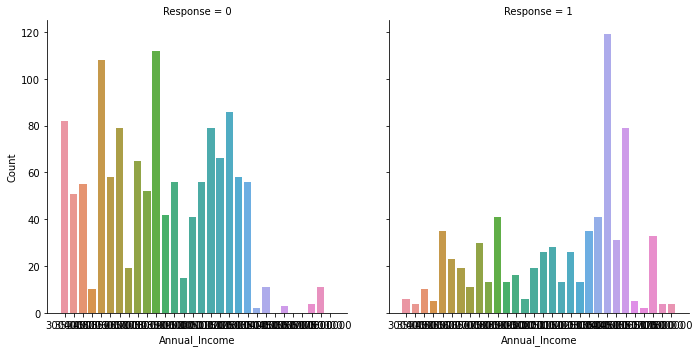

In [14]:
# Plot the relationship between Annual Income and Response
df4 = data.groupby(['Annual_Income','Response'])['Id'].count().to_frame().rename(columns = {'Id':'Count'}).reset_index()
graph4 = sns.catplot(x = 'Annual_Income', y = 'Count', col = 'Response',
                data = df4, kind = 'bar',
                height = 5, aspect = 1)

# visualise the result
plt.plot()

[]

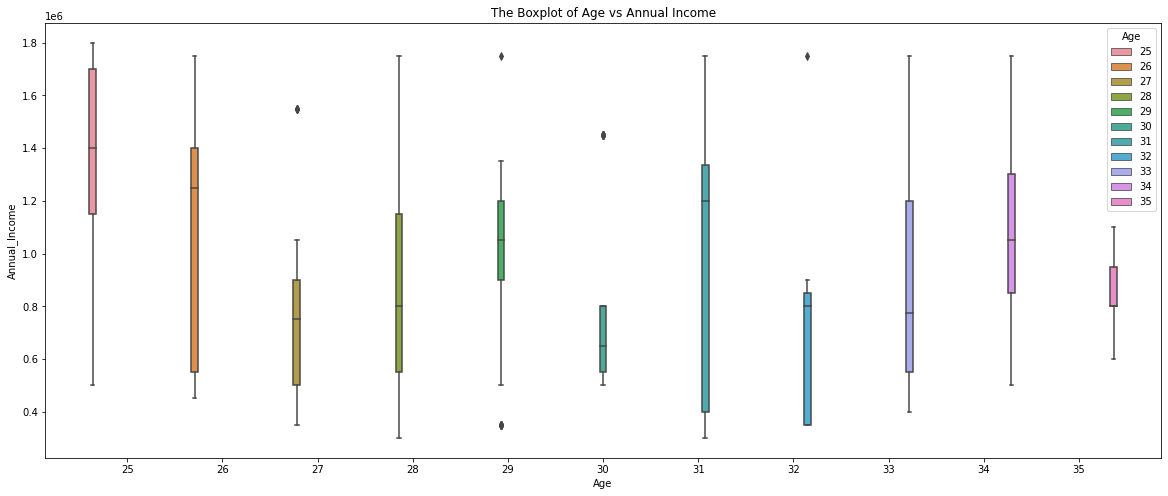

In [15]:
# The boxplot of the relationship between Age and Annual Income
fig , ax = plt.subplots(figsize = (20,8))
sns.boxplot(x = 'Age', y = 'Annual_Income', data = data, hue = 'Age')
plt.title('The Boxplot of Age vs Annual Income')

# visualise the result
plt.plot()

[]

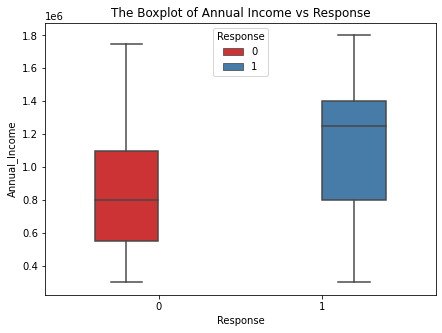

In [16]:
# The boxplot of the relationship between Annual Income and Response
fig , ax = plt.subplots(figsize = (7,5))
graph5 = sns.boxplot(x = 'Response', y = 'Annual_Income', data = data, hue = 'Response', palette = 'Set1')

plt.title('The Boxplot of Annual Income vs Response')
graph5.figure.get_axes()[0].legend(title = 'Response', loc = 'upper center')

# visualise the result
plt.plot()

[]

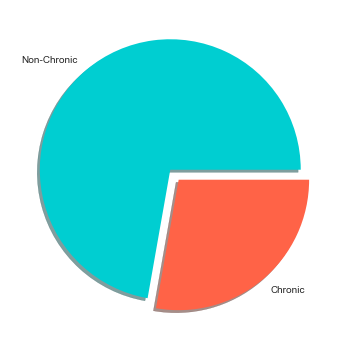

In [17]:
# The pie chart of the Chronic Diseases column
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (8,6))
plt.pie(x = data['Chronic_Diseases'].value_counts(), 
        colors = ['darkturquoise', 'tomato'], 
        labels = ['Non-Chronic', 'Chronic'], 
        shadow = True, 
        explode = (0, 0.1)
        )

# visualise the result
plt.plot()

In [18]:
# The boxplot by using plotly library

#box1 = go.Box(y = data['Age'], name = 'Age')
#box2 = go.Box(y = data['Family_Members'], name = 'Family Members')
#box3 = go.Box(y = data['Annual_Income'], name = 'Annual Income')

#data = [box1, box2, box3]
#iplot(data)

In [19]:
##### Feature Engineering #####

In [20]:
# Change the categorical data to the numerical data

# Government Sector : 1, Private Sector/Self Employed : 0
data['Employment_Type'].replace({'Government Sector': 1, 'Private Sector/Self Employed': 0}, inplace = True)

# Yes : 1, No : 0
data['Graduate'].replace({'Yes': 1, 'No': 0}, inplace = True)
data['Frequent_Flyer'].replace({'Yes': 1, 'No': 0}, inplace = True)
data['Ever_Travelled_Abroad'].replace({'Yes': 1, 'No': 0}, inplace = True)

In [21]:
# Delete the nonrelevant column

data.drop(['Id'], axis=1, inplace=True)

In [22]:
# The dataset after processing data
data.head()

Age  Employment_Type  Graduate  Annual_Income  Family_Members  \
0   31                1         1         400000               6   
1   31                0         1        1250000               7   
2   34                0         1         500000               4   
3   28                0         1         700000               3   
4   28                0         1         700000               8   

   Chronic_Diseases  Frequent_Flyer  Ever_Travelled_Abroad  Response  
0                 1               0                      0         0  
1                 0               0                      0         0  
2                 1               0                      0         1  
3                 1               0                      0         0  
4                 1               1                      0         0

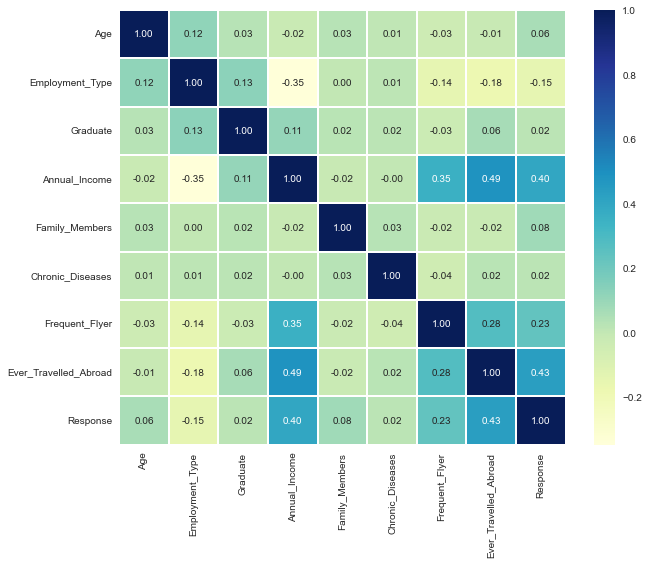

In [23]:
# The correlation matrix between data
fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', linewidths = 0.3, cmap = 'YlGnBu', cbar = True);

# save the file
plt.savefig('.../Correlation matrix', dpi=300, bbox_inches = 'tight')

# visualise the result
plt.show()

In [24]:
##### Data Preprocessing #####

In [25]:
# Normalise the data using Normalization

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
norm_data = pd.DataFrame(scaled, columns = data.columns)

# Split the feature columns and the target column

# X data
norm_X = norm_data.drop('Response', axis=1)
# y data
norm_y = norm_data['Response']

In [26]:
# Split the dataset into the training and testing datasets
# The training data 80% and the testing data 20%

X_train, X_test, y_train, y_test = train_test_split(norm_X, norm_y, test_size = 0.2, random_state = 42)

In [27]:
len(X_train), len(X_test)

(1589, 398)

In [28]:
##### Training the Models by setting all parameters as default #####

In [29]:
# 1. Random Forest 

rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
RandomForestScore = rf.score(X_test, y_test) * 100

print(f'Accuracy score using the Random Forest model: {round(RandomForestScore, 2)}%')

Accuracy score using the Random Forest model: 81.66%


In [30]:
# 2. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
LogisticRegressionScore = lr.score(X_test, y_test) * 100

print(f'Accuracy score using the Logistic Regression model: {round(LogisticRegressionScore, 2)}%')

Accuracy score using the Logistic Regression model: 76.63%


In [31]:
# 3. K-Nearest Neighbour (KNN)

# Apply K value = 2
knn = KNeighborsClassifier(2)
knn.fit(X_train, y_train)
KNNScore = knn.score(X_test, y_test) * 100

print(f'Accuracy score using the K-Nearest Neighbour model: {round(KNNScore, 2)}%')

Accuracy score using the K-Nearest Neighbour model: 79.4%


The maximum Score is : 79.4%


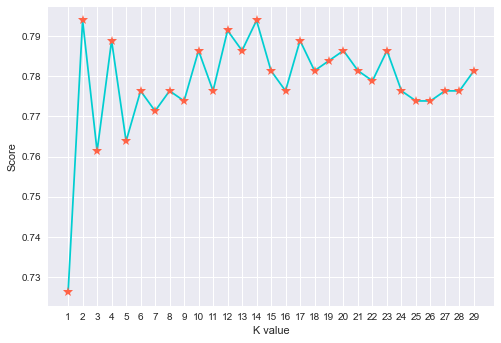

In [32]:
# Find the best k-value

k_value = []

for i in range(1,30):
    knn_i = KNeighborsClassifier(n_neighbors = i)
    knn_i.fit(X_train, y_train)
    k_value.append(knn_i.score(X_test, y_test))
    
plt.plot(range(1, 30), 
         k_value, 
         label = 'Accuracy Score', 
         color = 'darkturquoise', 
         linestyle = '-', 
         marker = '*',
         markerfacecolor = 'tomato', 
         markersize = 10
        )

plt.xticks(np.arange(1, 30, 1))
plt.xlabel('K value')
plt.ylabel('Score')

KNNMaxScore = max(k_value) * 100

print(f'The maximum Score is : {round(KNNMaxScore, 2)}%')

In [33]:
# K value =2 gave the best accuracy score of 79.4% for the K-Nearest Neighbour model

In [34]:
# 4. CatBoost

cat = CatBoostClassifier()
cat.fit(X_train, y_train)
CatBoostScore = cat.score(X_test, y_test) * 100

print(f'Accuracy score using the CatBoost model: {round(CatBoostScore, 2)}%')

Learning rate set to 0.012555
0:	learn: 0.6867731	total: 52.3ms	remaining: 52.2s
1:	learn: 0.6803682	total: 53.3ms	remaining: 26.6s
2:	learn: 0.6734175	total: 54.2ms	remaining: 18s
3:	learn: 0.6677630	total: 55.1ms	remaining: 13.7s
4:	learn: 0.6622553	total: 56ms	remaining: 11.1s
5:	learn: 0.6569350	total: 56.9ms	remaining: 9.42s
6:	learn: 0.6511240	total: 57.8ms	remaining: 8.19s
7:	learn: 0.6454245	total: 58.6ms	remaining: 7.27s
8:	learn: 0.6401805	total: 59.5ms	remaining: 6.55s
9:	learn: 0.6349681	total: 60.5ms	remaining: 5.98s
10:	learn: 0.6294126	total: 61.3ms	remaining: 5.51s
11:	learn: 0.6242231	total: 62.2ms	remaining: 5.12s
12:	learn: 0.6203701	total: 62.8ms	remaining: 4.77s
13:	learn: 0.6152290	total: 63.7ms	remaining: 4.49s
14:	learn: 0.6104438	total: 64.5ms	remaining: 4.24s
15:	learn: 0.6052187	total: 65.7ms	remaining: 4.04s
16:	learn: 0.6008837	total: 67.3ms	remaining: 3.89s
17:	learn: 0.5970364	total: 68.5ms	remaining: 3.74s
18:	learn: 0.5924911	total: 69.5ms	remaining: 3.

In [35]:
# 5. Decision Tree

tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train);
DecisionTreeScore = tree.score(X_test, y_test) * 100

print(f'Accuracy score using the Decision Tree model: {round(DecisionTreeScore, 2)}%')

Accuracy score using the Decision Tree model: 80.9%


In [36]:
# 6. Gradient Boosting

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
GradientBoostingScore = gb.score(X_test, y_test) * 100

print(f'Accuracy score using the Gradient Boosting model: {round(GradientBoostingScore, 2)}%')

Accuracy score using the Gradient Boosting model: 84.42%


In [37]:
# 7. Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
NaiveBayesScore = nb.score(X_test, y_test) * 100

print(f'Accuracy score using the Naive Bayes model: {round(NaiveBayesScore, 2)}%')

Accuracy score using the Naive Bayes model: 73.62%


In [38]:
# 8. XGBoost

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
XGBoostScore = xgb.score(X_test, y_test) * 100

print(f'Accuracy score using the XGBoost model: {round(XGBoostScore, 2)}%')

[16:35:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score using the XGBoost model: 82.66%


In [39]:
# 9. LightGBM

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
LGBMScore = lgbm.score(X_test, y_test) * 100

print(f'Accuracy score using the LGBMScore model: {round(LGBMScore, 2)}%')

Accuracy score using the LGBMScore model: 82.66%


In [40]:
# 10. AdaBoost

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
AdaScore = ada.score(X_test, y_test) * 100

print(f'Accuracy score using the AdaBoost model: {round(AdaScore, 2)}%')

Accuracy score using the AdaBoost model: 83.42%


In [41]:
##### Comparison of Model Accuracy Score #####

[]

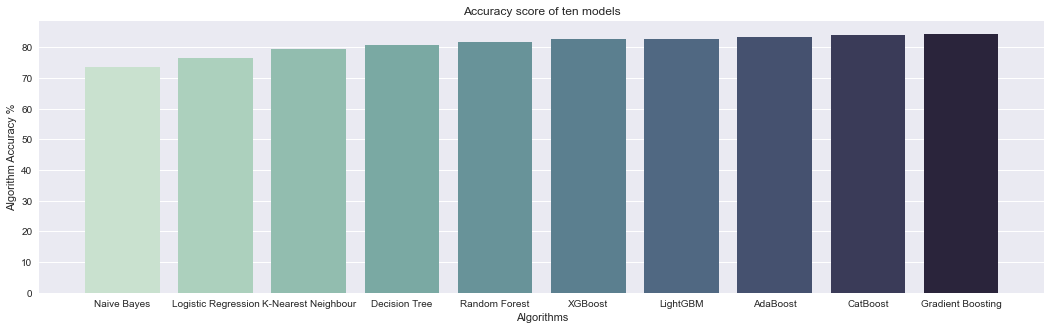

In [42]:
# Plotting the comparison of ten models

plt.style.use('seaborn-pastel')

x = ['Naive Bayes',
     'Logistic Regression',
     'K-Nearest Neighbour',
     'Decision Tree',
     'Random Forest',
     'XGBoost',
     'LightGBM',
     'AdaBoost',
     'CatBoost', 
     'Gradient Boosting']

y = [NaiveBayesScore,
     LogisticRegressionScore,
     KNNScore,
     DecisionTreeScore,
     RandomForestScore,
     XGBoostScore,
     LGBMScore,
     AdaScore,
     CatBoostScore,
     GradientBoostingScore]

fig, ax = plt.subplots(figsize =(18,5))
sns.barplot(x = x, y = y, palette = 'ch:start=.3,rot=-.5')
plt.xlabel('Algorithms')
plt.ylabel('Algorithm Accuracy %')
plt.title('Accuracy score of ten models')

#visualise the result
plt.plot()

In [43]:
# Visualise the accuracy score by table

results_df = pd.DataFrame(data=[[x[0], y[0]],
                                [x[1], y[1]],
                                [x[2], y[2]],
                                [x[3], y[3]],
                                [x[4], y[4]],
                                [x[5], y[5]],
                                [x[6], y[6]],
                                [x[7], y[7]],
                                [x[8], y[8]],
                                [x[9], y[9]]
                               ], 
                          columns=['Model', 'Algorithms Accuracy %'])

results_df

Model  Algorithms Accuracy %
0          Naive Bayes              73.618090
1  Logistic Regression              76.633166
2  K-Nearest Neighbour              79.396985
3        Decision Tree              80.904523
4        Random Forest              81.658291
5              XGBoost              82.663317
6             LightGBM              82.663317
7             AdaBoost              83.417085
8             CatBoost              83.919598
9    Gradient Boosting              84.422111

In [44]:
##### Hyperparameter Tuning with Grid Search Cross Validation #####

In [45]:
# 1. Random Forest

param_grid = {'max_depth': [90, 100, 110],
              'max_features': [2, 3, 5],
              'min_samples_leaf': [1, 3, 5],
              'min_samples_split': [10, 12, 15],
              'n_estimators': [50, 100, 500, 1000]}

grid_search_rf = GridSearchCV(estimator = rf, 
                              param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)

In [46]:
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=12, n_estimators=50; total time=   0.1s
[CV] END max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=12, n_estimators=500; total time=   1.5s
[CV] END max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=15, n_estimators=50; total time=   0.2s
[CV] END max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=15, n_estimators=50; total time=   0.2s
[CV] END max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=15, n_estimators=50; total time=   0.

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [90, 100, 110], 'max_features': [2, 3, 5],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [10, 12, 15],
                         'n_estimators': [50, 100, 500, 1000]},
             verbose=2)

In [47]:
# The best parameters of the Random Forest model after tuning Hyperparameters

grid_search_rf.best_params_

{'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 500}

In [48]:
# Accuracy score after tuning hyperparameters

best_params_rf = grid_search_rf.best_estimator_
y_pred_rf = best_params_rf.predict(X_test)
acc_score_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
print(f'Accuracy score for the Random Forest model after tuning hyperparamters: {acc_score_rf}%')

Accuracy score for the Random Forest model after tuning hyperparamters: 83.67%


In [49]:
# Compare with accuracy score before tuning hyperparameters

improved_rf = ((acc_score_rf - RandomForestScore) / RandomForestScore) * 100
print(f'Improvement for the Random Forest model after tuning hyperparamters: {round(improved_rf, 2)}%')

Improvement for the Random Forest model after tuning hyperparamters: 2.46%


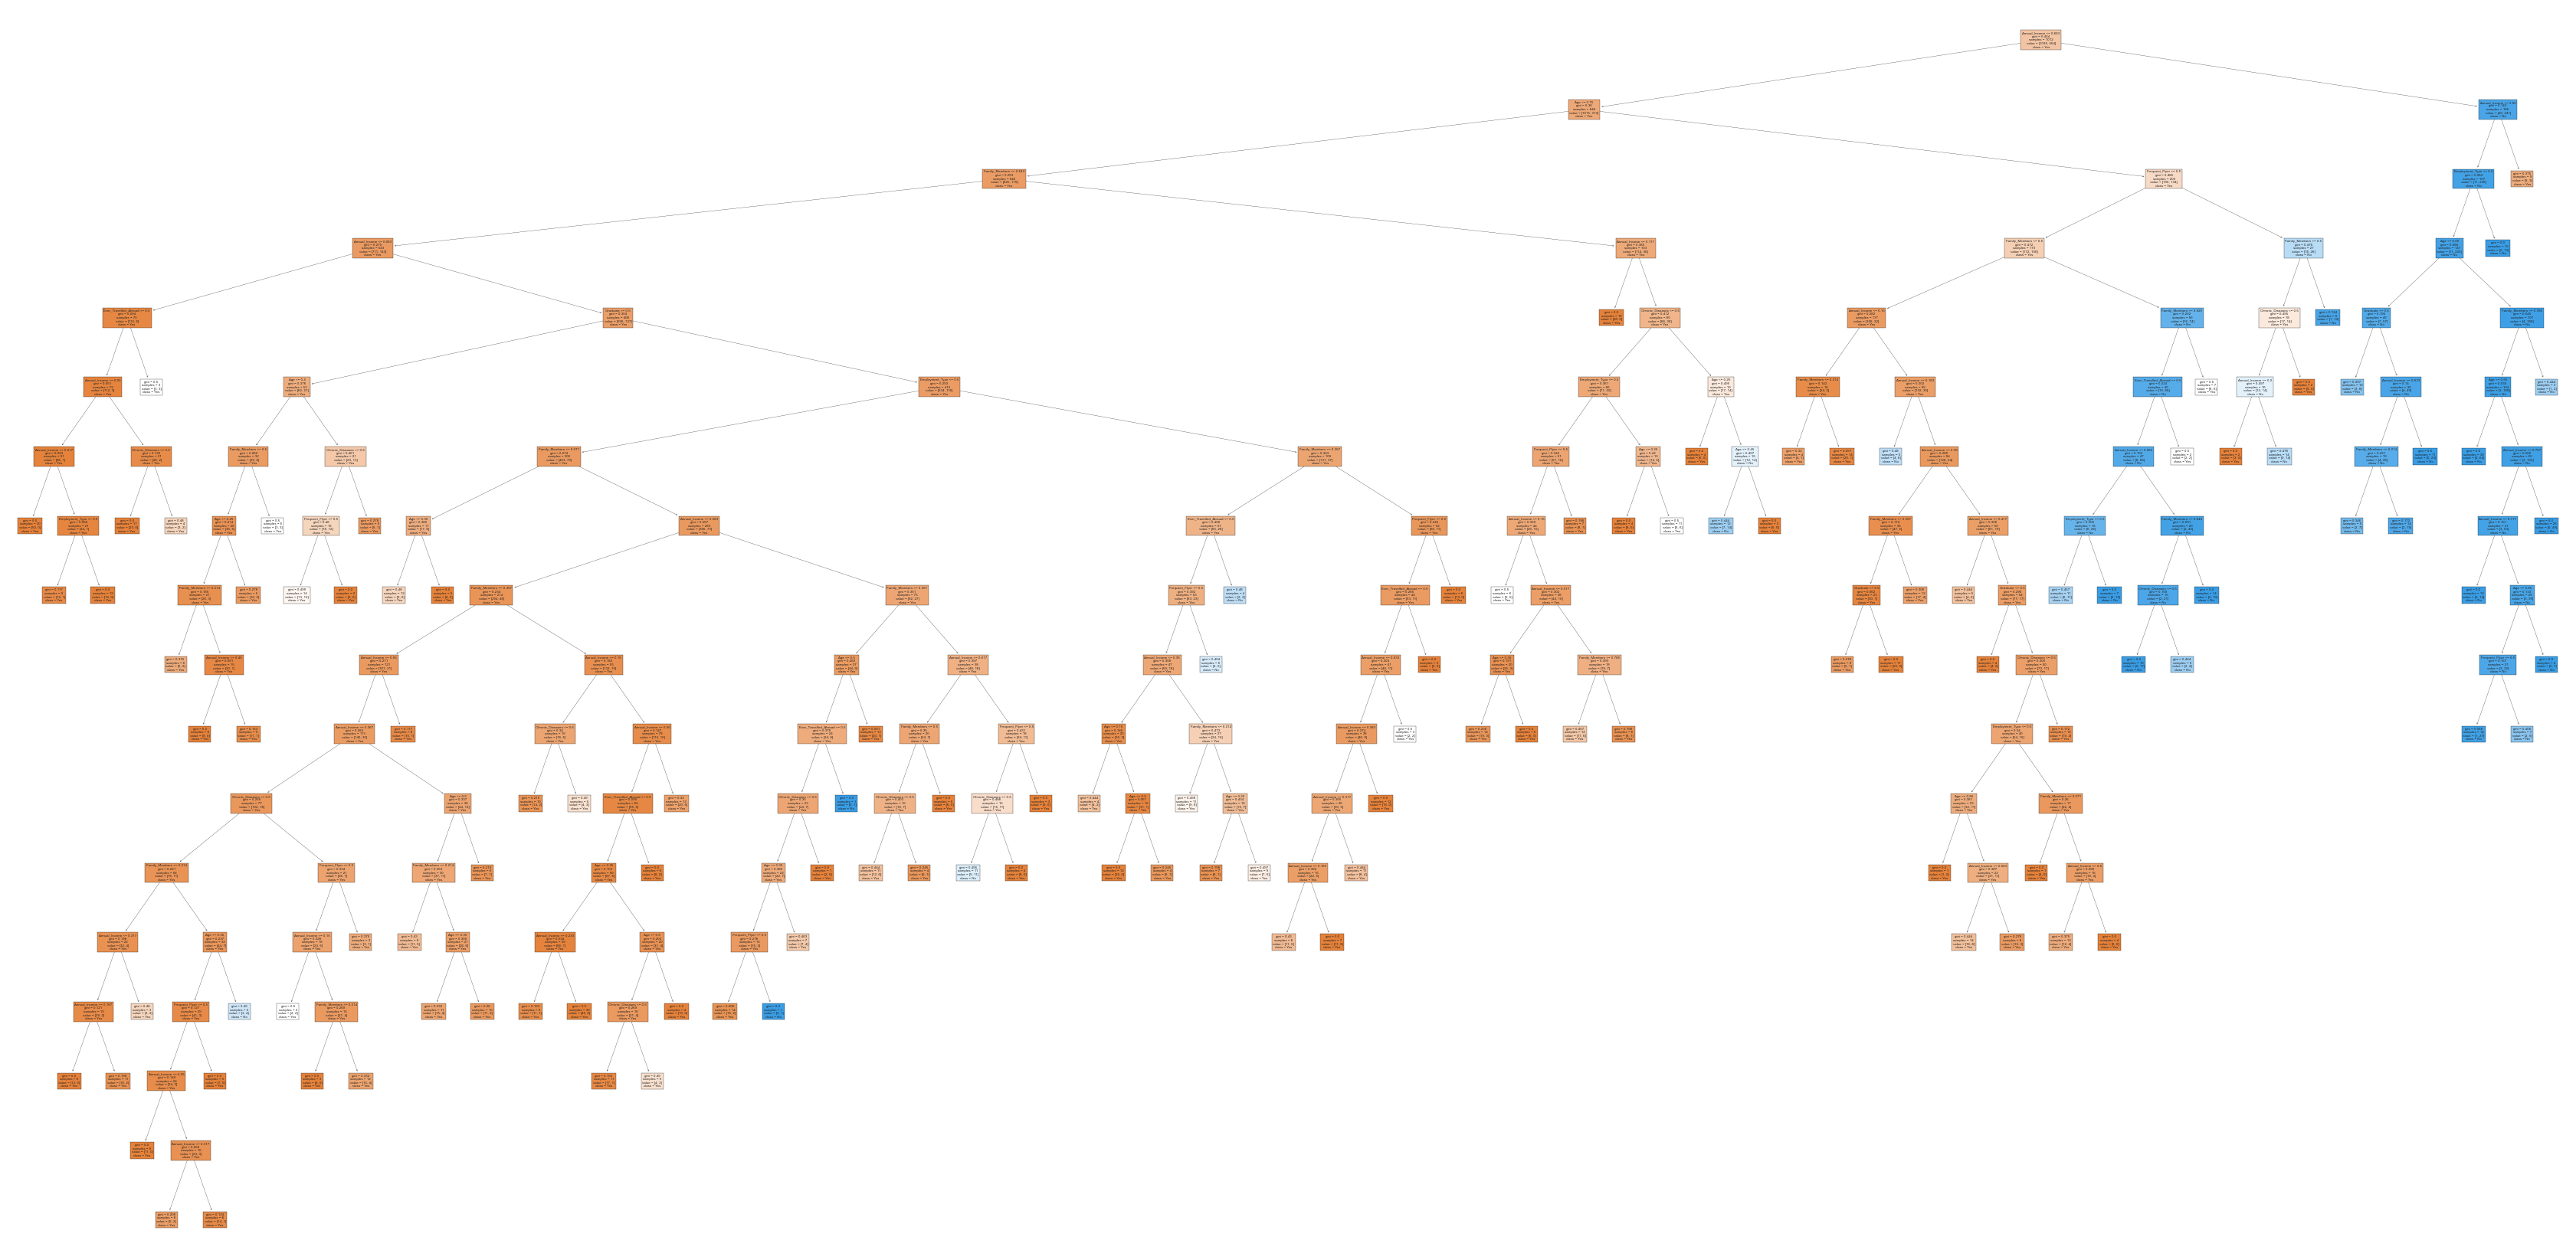

In [50]:
# Plot the tree of the Random Forest model
plt.figure(figsize=(60,30))
plot_tree(best_params_rf.estimators_[7], feature_names = X_test.columns,class_names=['Yes', 'No'],filled=True);

# save the file
plt.savefig('.../Random Forest', dpi=300, bbox_inches = 'tight')

# visualise the result
plt.show()

In [51]:
# 2. Gradient Boosting

param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1.0],
              'max_depth': [3, 5, 7],
              'min_samples_leaf':[4, 5, 6],
              'max_features':[3, 5, 7],
              'n_estimators': [50, 200, 500]}

grid_search_gb = GridSearchCV(estimator = gb, 
                              param_grid = param_grid, 
                              cv = 5, 
                              n_jobs = -1,
                              verbose = 2)

In [52]:
grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   1.4s
[CV] END max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=12, n_estimators=1000; total time=   3.3s
[CV] END max_depth=90, max_features=2, min_samples_leaf=1, min_samples_split=15, n_estimators=1000; total time=   3.4s
[CV] END max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   3.9s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=   2.0s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'max_depth': [3, 5, 7], 'max_features': [3, 5, 7],
                         'min_samples_leaf': [4, 5, 6],
                         'n_estimators': [50, 200, 500]},
             verbose=2)

In [53]:
# The best parameters of the Gradient Boosting model after tuning Hyperparameters

grid_search_gb.best_params_

{'learning_rate': 0.001,
 'max_depth': 3,
 'max_features': 7,
 'min_samples_leaf': 4,
 'n_estimators': 500}

In [54]:
# Accuracy score after tuning hyperparameters

best_params_gb = grid_search_gb.best_estimator_
y_pred_gb = best_params_gb.predict(X_test)
acc_score_gb = round(accuracy_score(y_test, y_pred_gb) * 100, 2)
print(f'Accuracy score for the Gradient Boosting model after tuning hyperparamters: {acc_score_gb}%')

Accuracy score for the Gradient Boosting model after tuning hyperparamters: 84.42%


In [55]:
# Compare with accuracy score before tuning hyperparameters

improved_gb = ((acc_score_gb - GradientBoostingScore) / GradientBoostingScore) * 100
print(f'Improvement for the Gradient Boosting model after tuning hyperparamters: {round(improved_gb, 2)}%')

Improvement for the Gradient Boosting model after tuning hyperparamters: -0.0%


In [56]:
# Accuracy score after tuning hyperparameters does not improve ## 

In [57]:
# 3. CatBoost

param_grid = {'depth': [10, 15, 20],
              'iterations': [50, 100, 200],
              'learning_rate': [0.001, 0.01, 0.1, 1.0],
              'random_strength': [1, 3, 5]}

grid_search_cat = GridSearchCV(estimator = cat, 
                              param_grid = param_grid, 
                              cv = 5, 
                              n_jobs = -1,
                              verbose = 2)

In [58]:
grid_search_cat.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

[CV] END learning_rate=0.01, max_depth=3, max_features=5, min_samples_leaf=5, n_estimators=500; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, max_features=5, min_samples_leaf=6, n_estimators=500; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, max_features=7, min_samples_leaf=4, n_estimators=500; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=3, max_features=7, min_samples_leaf=5, n_estimators=500; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=5, max_features=3, min_samples_leaf=4, n_estimators=50; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=5, max_features=3, min_samples_leaf=4, n_estimators=50; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=5, max_features=3, min_samples_leaf=4, n_estimators=200; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, max_features=3, min_samples_leaf=4, n_estimators=500; total time=   2.5s
[CV] END learning_

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f874a5e9820>,
             n_jobs=-1,
             param_grid={'depth': [10, 15, 20], 'iterations': [50, 100, 200],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'random_strength': [1, 3, 5]},
             verbose=2)

In [59]:
# The best parameters of the CatBoost model after tuning Hyperparameters

grid_search_cat.best_params_

{'depth': 10, 'iterations': 50, 'learning_rate': 0.01, 'random_strength': 1}

In [60]:
# Accuracy score after tuning hyperparameters

best_params_cat = grid_search_cat.best_estimator_
y_pred_cat = best_params_cat.predict(X_test)
acc_score_cat = round(accuracy_score(y_test, y_pred_cat) * 100, 2)
print(f'Accuracy score for the CatBoost model after tuning hyperparamters: {acc_score_cat}%')

Accuracy score for the CatBoost model after tuning hyperparamters: 83.92%


In [61]:
# Compare with accuracy score before tuning hyperparameters

improved_cat = ((acc_score_cat - CatBoostScore) / CatBoostScore) * 100
print(f'Improvement for the CatBoost model after tuning hyperparamters: {round(improved_cat, 2)}%')

Improvement for the CatBoost model after tuning hyperparamters: 0.0%


In [62]:
# Accuracy score after tuning hyperparameters does not improve #

In [63]:
##### Model Evaluation #####

In [64]:
# Confusion Matrix

# Predict the models
y_rf = grid_search_rf.predict(X_test)
y_lr = lr.predict(X_test)
y_knn = knn.predict(X_test)
y_cat = cat.predict(X_test)
y_tree = tree.predict(X_test)
y_gb = gb.predict(X_test)
y_nb = nb.predict(X_test)
y_xgb = xgb.predict(X_test)
y_lgbm = lgbm.predict(X_test)
y_ada = ada.predict(X_test)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_rf)
cm_lr = confusion_matrix(y_test, y_lr)
cm_knn = confusion_matrix(y_test, y_knn)
cm_cat = confusion_matrix(y_test, y_cat)
cm_tree = confusion_matrix(y_test, y_tree)
cm_gb = confusion_matrix(y_test, y_gb)
cm_nb = confusion_matrix(y_test, y_nb)
cm_xgb = confusion_matrix(y_test, y_xgb)
cm_lgbm = confusion_matrix(y_test, y_lgbm)
cm_ada = confusion_matrix(y_test, y_ada)

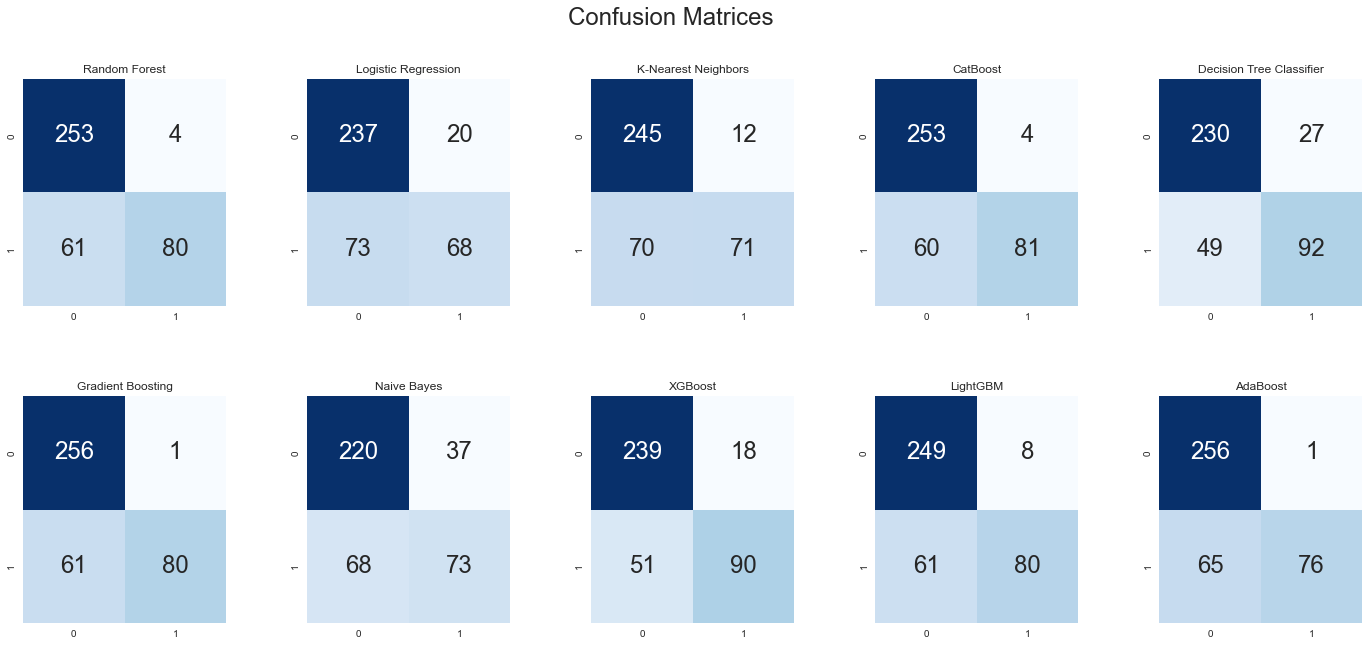

In [65]:
# Visualise the result on the screen

plt.figure(figsize=(24,10))

plt.suptitle('Confusion Matrices', fontsize = 24)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

plt.subplot(2,5,1)
plt.title('Random Forest')
sns.heatmap(cm_rf, annot = True, cmap = 'Blues', fmt = 'd', cbar=False, annot_kws = {'size': 24})

plt.subplot(2,5,2)
plt.title('Logistic Regression')
sns.heatmap(cm_lr, annot = True, cmap = 'Blues', fmt = 'd', cbar=False, annot_kws = {'size': 24})

plt.subplot(2,5,3)
plt.title('K-Nearest Neighbors')
sns.heatmap(cm_knn, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws = {'size': 24})

plt.subplot(2,5,4)
plt.title('CatBoost')
sns.heatmap(cm_cat, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws = {'size': 24})

plt.subplot(2,5,5)
plt.title('Decision Tree Classifier')
sns.heatmap(cm_tree, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws = {'size': 24})

plt.subplot(2,5,6)
plt.title('Gradient Boosting')
sns.heatmap(cm_gb, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws = {'size': 24})

plt.subplot(2,5,7)
plt.title('Naive Bayes')
sns.heatmap(cm_nb, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws = {'size': 24})

plt.subplot(2,5,8)
plt.title('XGBoost')
sns.heatmap(cm_xgb, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws = {'size': 24})

plt.subplot(2,5,9)
plt.title('LightGBM')
sns.heatmap(cm_lgbm, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws = {'size': 24})

plt.subplot(2,5,10)
plt.title('AdaBoost')
sns.heatmap(cm_ada, annot = True, cmap = 'Blues', fmt = 'd', cbar = False, annot_kws = {'size': 24})

# save the file
plt.savefig('.../Travel Insurance/Confusion Matrices', dpi=300, bbox_inches = 'tight')

# visualise the result
plt.show()

In [66]:
##### The best three models #####

In [67]:
# 1. Random Forest
# Score report for the Random Forest model after tuning Hyperparameters

grid_search_rf_predict = grid_search_rf.predict(X_test)
print(classification_report(y_test, grid_search_rf_predict))

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89       257
         1.0       0.95      0.57      0.71       141

    accuracy                           0.84       398
   macro avg       0.88      0.78      0.80       398
weighted avg       0.86      0.84      0.82       398



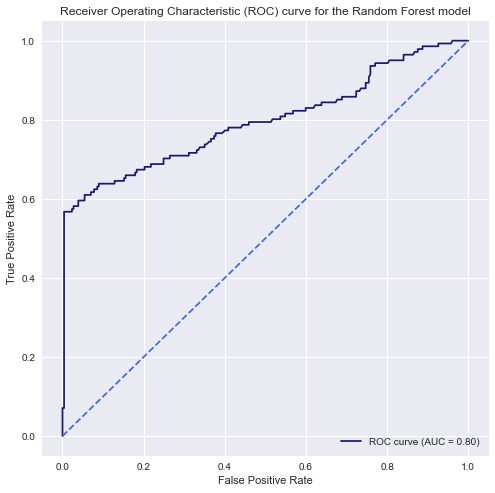

In [68]:
# The ROC Curve of the Random Forest model

# Use the probabilities for the ROC (Precision-Recall) curve
y_prob = grid_search_rf.predict_proba(X_test)[:,1]

# Calculate the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Visualise the ROC curve
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic (ROC) curve for the Random Forest model')
plt.plot(false_positive_rate,true_positive_rate, color='midnightblue',label = 'ROC curve (AUC = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot((0,1), ls='dashed', color = 'royalblue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [69]:
# 2. Gradient Boosting
# Score report for the Gradient Boosting after tuning Hyperparameters

gb_predict = gb.predict(X_test)
print(classification_report(y_test, gb_predict))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89       257
         1.0       0.99      0.57      0.72       141

    accuracy                           0.84       398
   macro avg       0.90      0.78      0.81       398
weighted avg       0.87      0.84      0.83       398



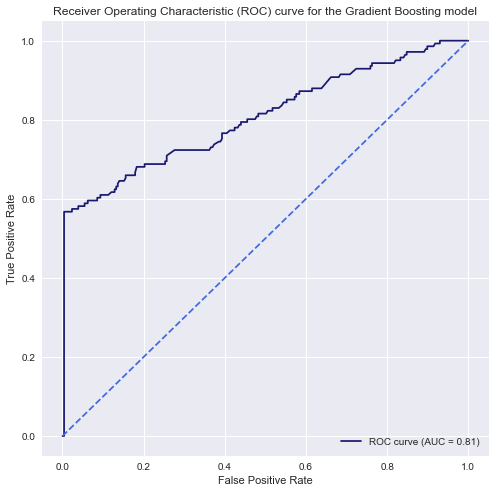

In [70]:
# The ROC Curve of the Gradient Boosting model

# Use the probabilities for the ROC (Precision-Recall) curve
y_prob = gb.predict_proba(X_test)[:,1]

# Calculate the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Visualise the ROC curve
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic (ROC) curve for the Gradient Boosting model')
plt.plot(false_positive_rate,true_positive_rate, color='midnightblue',label = 'ROC curve (AUC = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot((0,1), ls='dashed', color = 'royalblue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
# 3. CatBoost
# Score report for the CatBoost using the model before tuning Hyperparameters

cat_predict = cat.predict(X_test)
print(classification_report(y_test, cat_predict))

              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89       257
         1.0       0.95      0.57      0.72       141

    accuracy                           0.84       398
   macro avg       0.88      0.78      0.80       398
weighted avg       0.86      0.84      0.83       398



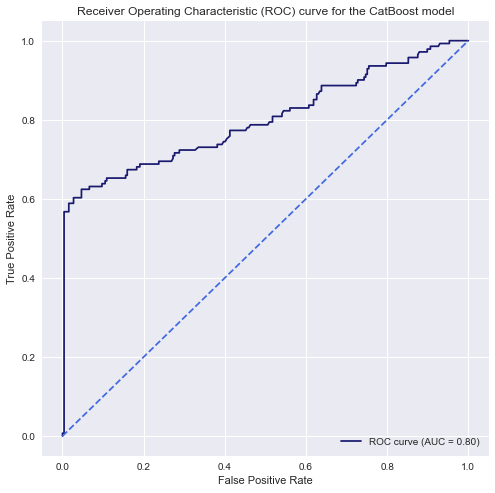

In [72]:
# The ROC Curve of the CatBoost model

# Use the probabilities for the ROC (Precision-Recall) curve
y_prob = cat.predict_proba(X_test)[:,1]

# Calculate the ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Visualise the ROC curve
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic (ROC) curve for the CatBoost model')
plt.plot(false_positive_rate,true_positive_rate, color='midnightblue',label = 'ROC curve (AUC = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot((0,1), ls='dashed', color = 'royalblue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [73]:
##### Comparison of the ROC Curve for each model #####

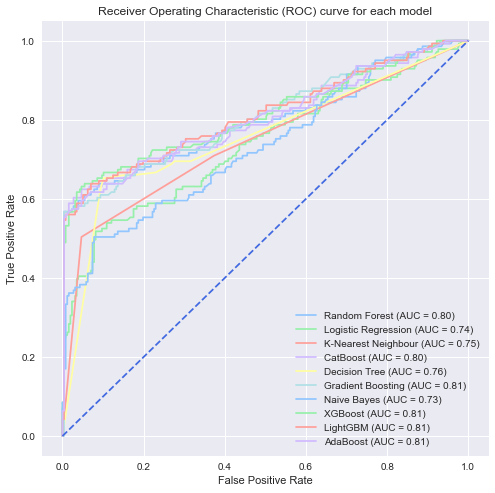

In [74]:
# Set the figure size
plt.figure(figsize=(8,8))

models = [
{
    'algorithm': 'Random Forest',
    'model': grid_search_rf,
},
{
    'algorithm': 'Logistic Regression',
    'model': lr,
},
{
    'algorithm': 'K-Nearest Neighbour',
    'model': knn,
},
{
    'algorithm': 'CatBoost',
    'model': cat,
},
{
    'algorithm': 'Decision Tree',
    'model': tree,
},
{
    'algorithm': 'Gradient Boosting',
    'model': gb,
},
{
    'algorithm': 'Naive Bayes',
    'model': nb,
},
{
    'algorithm': 'XGBoost',
    'model': xgb,
},
{
    'algorithm': 'LightGBM',
    'model': lgbm,
},
{
    'algorithm': 'AdaBoost',
    'model': ada,
}  
]

# Visualise the plot
for m in models:
    model = m['model']
    false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(false_positive_rate, true_positive_rate,label = '%s (AUC = %0.2f)' % (m['algorithm'], roc_auc))

# Set the plot and create reference line
plt.plot((0,1), ls='dashed', color = 'royalblue')
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')    
plt.title('Receiver Operating Characteristic (ROC) curve for each model')

# save the file
plt.savefig('.../ROC Curve', dpi=300, bbox_inches = 'tight')

# visualise the result
plt.show()

In [75]:
##### Important Features of the Gradient Boosting model #####

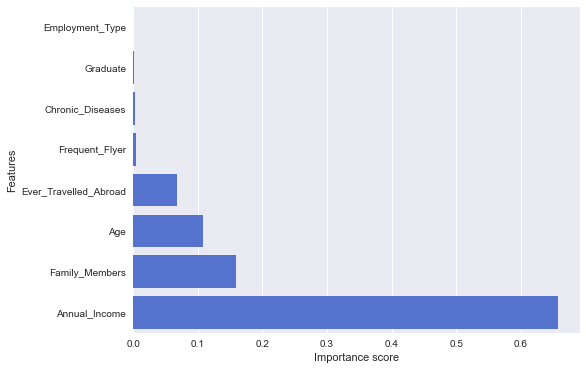

In [76]:
# Set the figure size
plt.figure(figsize=(8,6))

# create the function to visualise the result
def imp_feat(model, x_train):
    values = sorted(zip(X_train.columns, model.best_estimator_.feature_importances_), key = lambda x: x[1] * -1)
    im_fe = pd.DataFrame(values, columns = ['Name', 'Score'])
    im_fe.sort_values(by = 'Score', inplace = True)
    sns.barplot(x = 'Score', y = 'Name', 
                linewidth = 1,
                data = im_fe, 
                color = 'royalblue').set(xlabel = 'Importance score', 
                                             ylabel = 'Features')

# Important Features
imp_feat(grid_search_gb, X_train)